In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:35,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2024-03-31,0.97541
2024-06-30,-0.195958
2024-09-30,-0.067054
2024-12-31,1.687901


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104
2025-03-31,4.839644


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="M",periods=len(kart)))
kart=kart.dropna()
kart=kart.resample("Q").mean()
kart=kart.pct_change().dropna()*100
kart

,Kart
2014-06-30,6.754972
2014-09-30,4.782597
2014-12-31,0.186316
2015-03-31,3.013984
2015-06-30,10.511476
2015-09-30,2.186056
2015-12-31,-0.932084
2016-03-31,0.701274
2016-06-30,7.737326
2016-09-30,1.395230


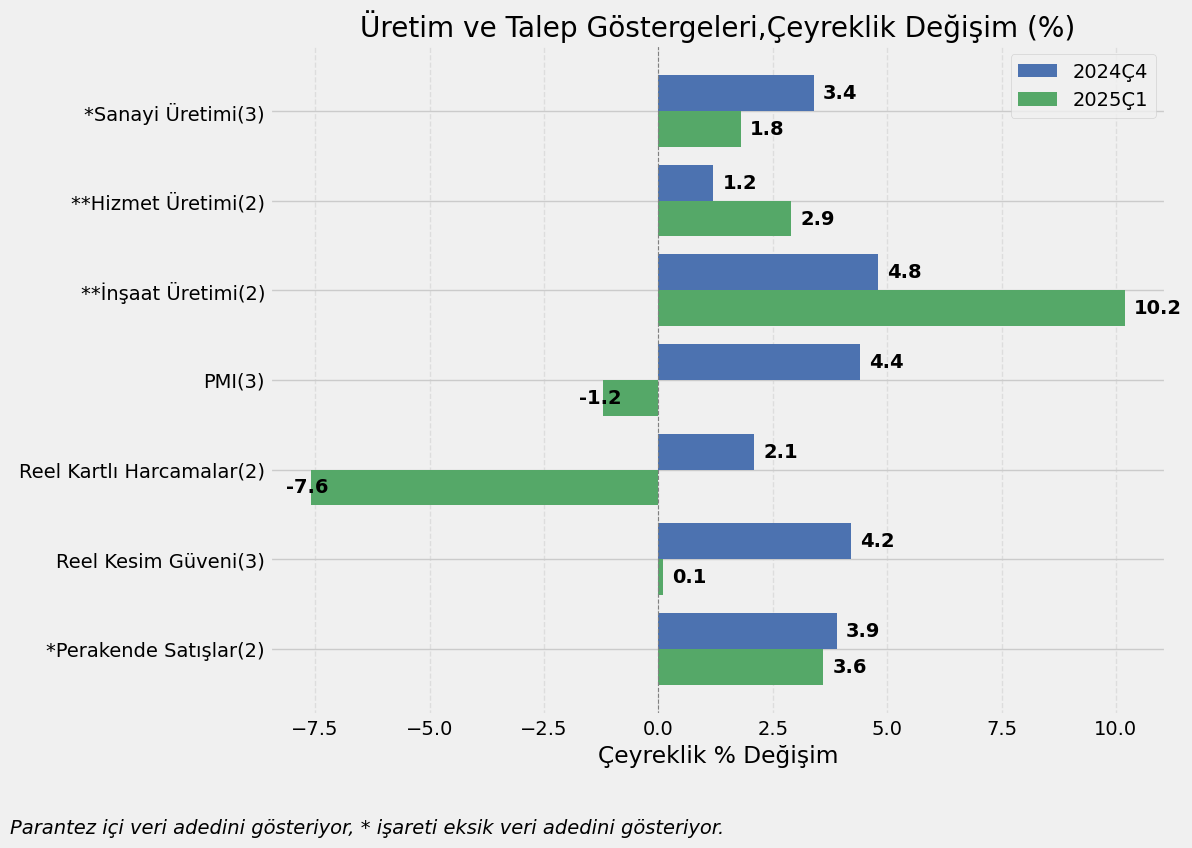

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veri tanımı
gösterge = pd.DataFrame(columns=["2024Ç4", "2025Ç1"])
gösterge.loc["*Sanayi Üretimi(3)"] = [3.4, 1.8]
gösterge.loc["**Hizmet Üretimi(2)"] = [1.2, 2.9]
gösterge.loc["**İnşaat Üretimi(2)"] = [4.8, 10.2]
gösterge.loc["PMI(3)"] = [4.4, -1.2]
gösterge.loc["Reel Kartlı Harcamalar(2)"] = [2.1, -7.6]
gösterge.loc["Reel Kesim Güveni(3)"] = [4.2, 0.1]
gösterge.loc["*Perakende Satışlar(2)"] = [3.9, 3.6]

# 2024 üstte olacak şekilde sıralama
gösterge = gösterge[["2024Ç4", "2025Ç1"]]

y = np.arange(len(gösterge))
bar_width = 0.4

# Grafik oluştur
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y - bar_width/2, gösterge["2024Ç4"], height=bar_width, label='2024Ç4', color='#4C72B0')
bars2 = ax.barh(y + bar_width/2, gösterge["2025Ç1"], height=bar_width, label='2025Ç1', color='#55A868')

# Değerleri kalın olarak ekle
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ha = 'left' if width >= 0 else 'right'
        offset = 0.2 if width >= 0 else 0.4  # negatiflerde daha büyük boşluk
        ax.text(width + offset, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', ha=ha, fontweight='bold')

fig.text(0.01, -0.05, "Parantez içi veri adedini gösteriyor, * işareti eksik veri adedini gösteriyor.", 
         ha='left', va='center', fontsize=14, style='italic')

# Eksen ayarları
ax.set_yticks(y)
ax.set_yticklabels(gösterge.index)
ax.invert_yaxis()  # Bu satır önemli!
ax.set_xlabel('Çeyreklik % Değişim')
ax.set_title('Üretim ve Talep Göstergeleri,Çeyreklik Değişim (%)')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')
ax.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [9]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.983028
1999-09-30,-0.087589
1999-12-31,2.527688
2000-03-31,3.548424
2000-06-30,-0.170653
...,...
2024-06-30,0.642857
2024-09-30,0.964185
2024-12-31,2.046257
2025-03-31,0.745974


In [10]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [11]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [12]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-06-30,64.998462
2024-09-30,60.784615
2024-12-31,59.899231
2025-03-31,58.065385


In [13]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-06-30,55.676923
2024-09-30,54.312308
2024-12-31,54.683077
2025-03-31,50.635385


In [14]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-06-30,63.980000
2024-09-30,59.349231
2024-12-31,59.299231
2025-03-31,52.840769


In [15]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi.iloc[-1,0]=1.76
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2024-06-30,-3.602327
2024-09-30,-1.057099
2024-12-31,3.285374
2025-03-31,1.732813


In [16]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [17]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [18]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816
2025-03-31,9.034479


In [19]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095
2025-03-31,5.691436


In [20]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605
2025-03-31,0.097308


In [21]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [22]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))

kko=kko.diff().dropna()
kko

,KKO
2007-06-30,1.533333
2007-09-30,-1.133333
2007-12-31,-0.333333
2008-03-31,-0.733333
2008-06-30,0.300000
...,...
2024-06-30,-0.266667
2024-09-30,-0.766667
2024-12-31,-0.366667
2025-03-31,-0.500000


In [23]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2005-03-31,9.200000
2005-06-30,9.400000
2005-09-30,9.100000
2005-12-31,9.300000
2006-03-31,9.133333
...,...
2024-06-30,8.700000
2024-09-30,8.666667
2024-12-31,8.633333
2025-03-31,8.266667


In [24]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233
2025-03-31,1.624626


In [25]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [26]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,-1.441678
2016-06-30,-3.125000
2016-09-30,-1.921757
2016-12-31,2.379286
2017-03-31,3.007519
2017-06-30,6.104844
2017-09-30,1.563477
2017-12-31,-1.108374
2018-03-31,1.556663
2018-06-30,-12.875536


In [27]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2025-06-30"]
data.iloc[-1:]=data.iloc[-1:].fillna(0)
#data["İşsizlik"].iloc[-1]=8.
data=data.astype(float)
data=data.fillna(method="ffill")
data=data.dropna()
data["Büyüme"].iloc[-1]=0
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.133333,12.387354,10.366667,7.737326,3.679217,2.954271,2.858421,9.655385,...,2.226839,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-3.125000
2016-09-30,-2.867673,-11.986557,-0.566667,-11.706412,11.266667,1.395230,2.393532,3.287543,3.173361,9.039286,...,0.787363,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-1.921757
2016-12-31,5.509612,18.585843,0.700000,10.443895,11.733333,-0.116399,7.431690,5.087110,4.898119,8.851538,...,1.800290,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,2.379286
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.503631,5.128144,4.833735,4.709149,8.805385,...,1.373486,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,3.007519
2017-06-30,2.280319,4.684057,1.100000,13.467062,11.233333,9.470449,5.390604,4.335505,4.227601,10.147692,...,1.123214,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,6.104844
2017-09-30,1.515919,-4.403850,-0.400000,5.743089,10.466667,6.472579,3.331476,3.046696,3.148272,10.856923,...,2.489905,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,1.563477
2017-12-31,1.882761,12.045111,0.933333,6.168259,10.100000,0.832021,6.523372,4.880301,5.005775,11.167692,...,0.890710,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,-1.108374
2018-03-31,1.267288,-2.255476,-0.433333,-2.529621,9.933333,0.824459,3.350712,1.892066,2.053103,11.386923,...,0.789974,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,1.556663
2018-06-30,0.588499,0.252231,-0.866667,-0.590437,10.500000,10.769134,8.472543,8.311555,8.300886,12.697692,...,-0.216484,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,-12.875536
2018-09-30,-0.961150,-0.943565,-1.233333,-16.392345,11.166667,8.374747,10.581760,11.410152,10.947282,17.533077,...,-0.935682,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-2.814919


In [28]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.445329,0.075663,1.043553,-0.381442,-0.271107,-0.547229,-0.875576,-0.942223,-0.775915,-0.800700,...,-0.089114,-0.068584,-0.961413,0.252652,-0.814288,-1.030812,-0.233723,0.766902,-0.481303,0.077603
1,-1.375408,-0.181063,-1.477534,0.146343,-0.846231,-0.775867,-0.813037,-0.882678,-0.816981,-0.838991,...,-0.035133,-0.539918,-0.919739,0.333028,-0.908224,-0.581857,-0.074769,-0.956487,-0.298873,-1.136853
2,1.636540,0.283489,0.840197,0.420009,-0.983311,0.120086,-0.475349,-0.556580,-0.829495,-0.850890,...,0.097081,0.459688,-0.776959,-0.415502,-0.610275,0.351492,0.014541,1.098160,0.353229,1.229949
3,-0.406423,0.026763,-0.413056,0.537294,-0.836401,-0.289562,-0.522894,-0.592308,-0.832571,-0.830311,...,-0.162135,0.059373,-0.381794,-0.520554,-0.022365,0.560191,-0.650888,0.305668,0.448478,0.060080
4,0.266956,0.430189,1.156530,0.126795,-0.113942,-0.242888,-0.616387,-0.683354,-0.743101,-0.735518,...,0.237667,0.361161,-0.758677,0.942816,-0.763351,-1.178533,0.675813,-0.562555,0.918079,0.317589
5,-0.628371,-0.119938,0.348321,-0.322799,-0.385799,-0.609069,-0.858232,-0.887421,-0.695828,-0.710982,...,0.331614,0.163436,-1.067037,-0.001796,-0.847883,-1.037530,0.130286,1.191467,0.229540,0.101626
6,0.992156,0.369064,0.392809,-0.537823,-0.897305,-0.041444,-0.514156,-0.536226,-0.675114,-0.692499,...,0.058331,0.375511,-0.504575,-0.953254,-0.536425,0.046750,0.034410,-0.096102,-0.175552,0.205269
7,-0.416716,-0.132163,-0.517307,-0.635561,-0.897991,-0.605649,-1.074899,-1.094484,-0.660501,-0.671129,...,-0.019596,-0.264868,-0.700216,0.942526,-0.414678,-0.793365,0.001287,-0.110867,0.228507,0.031382
8,-0.169661,-0.291088,-0.314397,-0.303252,0.003828,0.305184,0.129719,0.086777,-0.573134,-0.600453,...,-0.580057,-0.338170,-0.356950,-0.267361,0.017475,0.778864,-0.481976,-0.170154,-1.959629,-0.160394
9,-0.287469,-0.425564,-1.967853,0.087700,-0.213304,0.680273,0.711171,0.587127,-0.250836,-0.288188,...,-1.093956,-0.403104,-0.047586,-0.755971,0.723293,2.250124,-0.875500,-0.133870,-0.434290,-0.598210


In [29]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [30]:
import optuna
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
predictions=[]
features_set=[]

def objective(trial):
    selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]

    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
    y_train,y_test=y[:-12],y[-12:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])
    predictions.append(scaler.inverse_transform(y_pred)[-1])
    features_set.append(selected_features)

    return mse  # Return validation accuracy as the objective

In [32]:
data[["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
].tail()

,KKO,Kart,Sanayi,Tüketici Güven,Normal Sipariş,Reel Güven,Elektrik
2024-06-30,-0.266667,19.552978,-3.602327,0.062309,0.209468,-0.648508,1.468599
2024-09-30,-0.766667,14.470097,-1.057099,-3.679452,-5.852843,-3.426893,1.024188
2024-12-31,-0.366667,4.272443,3.285374,4.829936,3.863233,4.190605,1.024188
2025-03-31,-0.500000,7.530197,1.732813,3.019643,1.624626,0.097308,1.024188
2025-06-30,-0.266667,13.399502,1.760000,1.939223,-0.504838,-3.499676,0.000000


In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=500)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [58]:
trials=study.trials_dataframe()[:-1]
trials=trials.sort_values(by="value")

In [59]:
trials.to_excel("trials3.xlsx")

In [34]:
scaled_data=scaled_data.dropna()


In [43]:
study.best_params

{'learning_rate': 0.04763200776094243,
 'units1': 132,
 'batch_size': 34,
 'activation1': 'relu',
 'optimizer': 'adam',
 'rlrate': 0.8053599103913421}

In [33]:
trials=pd.read_excel("trials1.xlsx")
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","PMI","Reel Güven"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
modeller=pd.DataFrame()
hata=[]
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=132,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8053599103913421)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.04763200776094243)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=34,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-12-31",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 75ms/step
1.3338983
1/1 [==============================] - 0s 68ms/step
0.7742357
1/1 [==============================] - 0s 61ms/step
0.5111389
1/1 [==============================] - 0s 95ms/step
-0.9325293
1/1 [==============================] - 0s 56ms/step
-0.14864807
1/1 [==============================] - 0s 60ms/step
-0.2828342
1/1 [==============================] - 0s 55ms/step
0.5787893
1/1 [==============================] - 0s 60ms/step
0.6915021
1/1 [==============================] - 0s 60ms/step
-0.3120164
1/1 [==============================] - 0s 56ms/step
-0.61210626


In [34]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=132,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8053599103913421)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04763200776094243)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=34,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 21ms/step


,Büyüme
2022-09-30,-0.413247
2022-12-31,0.964312
2023-03-31,0.911620
2023-06-30,3.381589
2023-09-30,1.059813
2023-12-31,0.389933
2024-03-31,1.287534
2024-06-30,0.031245
2024-09-30,-0.856028
2024-12-31,1.601686


In [35]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,-0.413247
2022-12-31,1.148543,0.964312
2023-03-31,0.101158,0.911620
2023-06-30,3.998077,3.381589
2023-09-30,0.239144,1.059813
2023-12-31,1.166981,0.389933
2024-03-31,0.975410,1.287534
2024-06-30,-0.195958,0.031245
2024-09-30,-0.067054,-0.856028
2024-12-31,1.687901,1.601686


In [36]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.4052205040163069

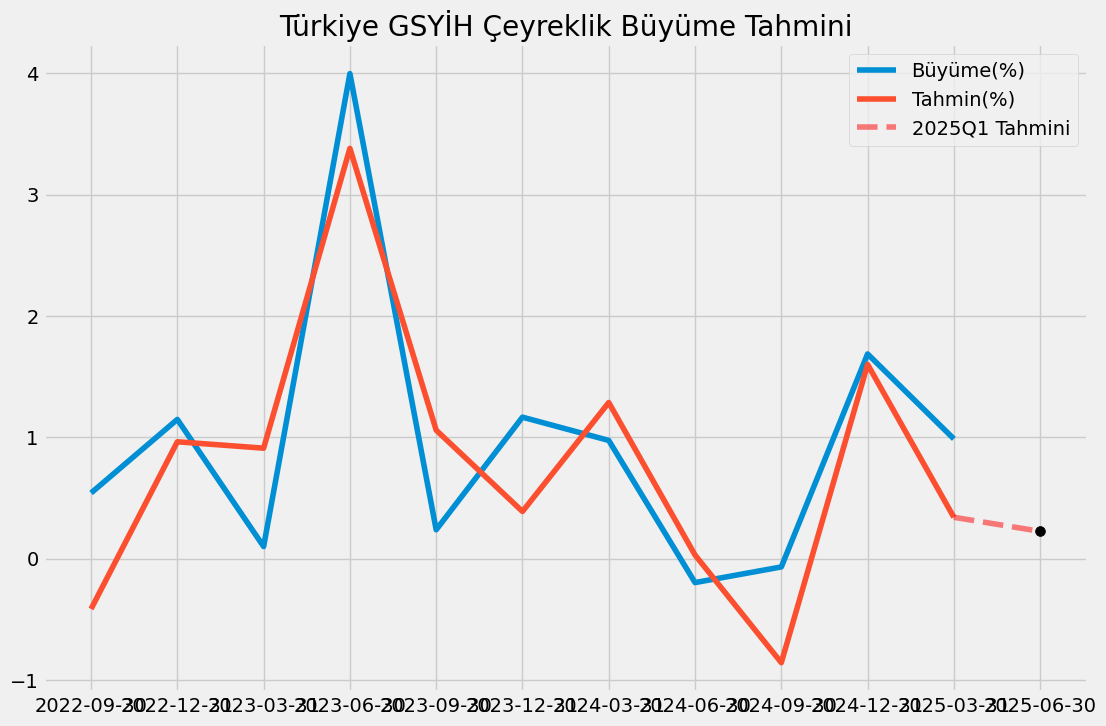

In [37]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2025Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [38]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=238,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.4734815856479897)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.024505480684894925)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=16,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-12:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+10}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 68ms/step
0.62777853
1/1 [==============================] - 0s 58ms/step
0.8511235
1/1 [==============================] - 0s 57ms/step
0.2084722
1/1 [==============================] - 0s 56ms/step
-0.27301446
1/1 [==============================] - 0s 60ms/step
0.74741733
1/1 [==============================] - 0s 338ms/step
1.426626
1/1 [==============================] - 0s 58ms/step
-0.25642112
1/1 [==============================] - 0s 59ms/step
1.3337193
1/1 [==============================] - 0s 54ms/step
1.279776
1/1 [==============================] - 0s 59ms/step
0.39652988


In [39]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=238,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.4734815856479897)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.024505480684894925)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=16,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))


pred

1/1 [==============================] - 0s 58ms/step


,Büyüme
2022-09-30,0.599724
2022-12-31,1.405603
2023-03-31,0.769401
2023-06-30,3.769840
2023-09-30,0.136294
2023-12-31,0.579366
2024-03-31,1.440764
2024-06-30,0.139038
2024-09-30,-0.617613
2024-12-31,1.483224


In [40]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler2=tahminler2.round(1)
tahminler2

,Büyüme,Tahmin
2022-09-30,0.5,0.6
2022-12-31,1.1,1.4
2023-03-31,0.1,0.8
2023-06-30,4.0,3.8
2023-09-30,0.2,0.1
2023-12-31,1.2,0.6
2024-03-31,1.0,1.4
2024-06-30,-0.2,0.1
2024-09-30,-0.1,-0.6
2024-12-31,1.7,1.5


In [41]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.15454545308243198

In [42]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=67,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6803319536182122)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.06057331020597876)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=121,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-12:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+20}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 66ms/step
1.8797357
1/1 [==============================] - 0s 84ms/step
0.13404913
1/1 [==============================] - 0s 81ms/step
0.41796258
1/1 [==============================] - 0s 56ms/step
-0.3425403
1/1 [==============================] - 0s 56ms/step
0.2359214
1/1 [==============================] - 0s 54ms/step
-0.05518297
1/1 [==============================] - 0s 56ms/step
1.4320126
1/1 [==============================] - 0s 59ms/step
0.14562352
1/1 [==============================] - 0s 59ms/step
1.2151103
1/1 [==============================] - 0s 57ms/step
-0.2475336


In [43]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=67,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6803319536182122)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.06057331020597876)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=121,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 24ms/step


,Büyüme
2022-09-30,-0.243316
2022-12-31,1.166556
2023-03-31,0.454641
2023-06-30,3.041071
2023-09-30,0.693879
2023-12-31,0.348880
2024-03-31,1.354023
2024-06-30,0.212448
2024-09-30,-0.285355
2024-12-31,1.820339


1/1 [==============================] - 0s 27ms/step


  0%|          | 0/12 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step
İlk test örneği için feature katkıları:
KKO: -0.037446
Kart: 0.128528
Sanayi: -0.044029
Tüketici Güven: 0.102928
Normal Sipariş: -0.055534
Reel Güven: -0.094057
Elektrik: 0.026468


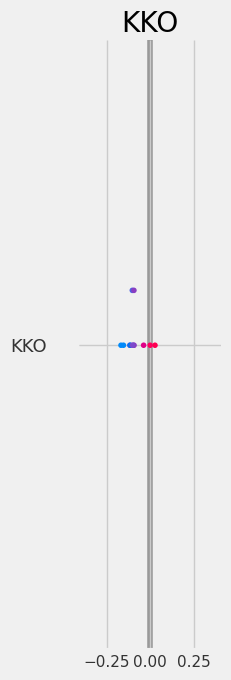

In [44]:
import shap
import numpy as np

# 1. Referans veri olarak X_train'den örnek al (veri azsa tümünü kullan)
sample_size = min(100, X_train.shape[0])
X_train_sample = X_train.sample(n=sample_size, random_state=42)

# 2. KernelExplainer oluştur
explainer = shap.KernelExplainer(model.predict, X_train_sample)

# 3. SHAP değerlerini X_test için hesapla (hesaplama yavaş olabilir)
shap_values = explainer.shap_values(X_test, nsamples=100)

# 4. SHAP değerleri numpy array, her satır bir örnek, her sütun bir feature katkısıdır
# Örnek: ilk test örneği için katkıları yazdır
print("İlk test örneği için feature katkıları:")
for feature, val in zip(selected_features, shap_values[-1].reshape(1,-1)[0]):
    katkı=0.0571+val
    print(f"{feature}: {katkı:.6f}")

# 5. İsterseniz tüm test örnekleri için global feature importance özet grafiği:
shap.summary_plot(shap_values, X_test)


In [45]:
print("İlk test örneği için feature katkıları:")
katkılar3=[]
for feature, val in zip(selected_features, shap_values[-1].reshape(1,-1)[0]):
    katkı=0.0356+val
    print(f"{feature}: {katkı:.6f}")
    katkılar3.append(katkı)

İlk test örneği için feature katkıları:
KKO: -0.058946
Kart: 0.107028
Sanayi: -0.065529
Tüketici Güven: 0.081428
Normal Sipariş: -0.077034
Reel Güven: -0.115557
Elektrik: 0.004968


In [46]:
print("İlk test örneği için feature katkıları:")
katkılar2=[]
for feature, val in zip(selected_features, shap_values[-1].reshape(1,-1)[0]):
    katkı=0.0821+val
    print(f"{feature}: {katkı:.6f}")
    katkılar2.append(katkı)

İlk test örneği için feature katkıları:
KKO: -0.012446
Kart: 0.153528
Sanayi: -0.019029
Tüketici Güven: 0.127928
Normal Sipariş: -0.030534
Reel Güven: -0.069057
Elektrik: 0.051468


In [47]:
katkılar3=pd.DataFrame(katkılar3)
selected_features=['KKO',
 'Kartlı Harcamalar',
 'Sanayi',
 'Tüketici Güveni',
 'Sipariş Adedi',
 'PMI',
 'Reel Güven']
katkılar3.index=selected_features
katkılar3=katkılar3.sort_values(by=0)
katkılar3.loc["Toplam"]=katkılar3.sum()
katkılar3

,0
PMI,-0.106545
Sipariş Adedi,-0.078850
Sanayi,-0.061684
KKO,-0.044948
Reel Güven,0.013982
Tüketici Güveni,0.078034
Kartlı Harcamalar,0.184845
Toplam,-0.015167


In [48]:
katkılar2=pd.DataFrame(katkılar2)
selected_features=['KKO', 'Kartlı Harcamalar', 'Sanayi', 'Tüketici Güveni', 'Sipariş Adedi', 'Reel Güven']
katkılar2.index=selected_features
katkılar2=katkılar2.sort_values(by=0)
katkılar2.loc["Toplam"]=katkılar2.sum()
katkılar2

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [49]:
katkılar=pd.DataFrame(katkılar)
selected_features=['KKO',
 'Kartlı Harcamalar',
 'Sanayi',
 'Tüketici Güveni',
 'Sipariş Adedi',
 'Reel Güven',
 'Elektrik Tüketimi']
katkılar.index=selected_features
katkılar=katkılar.sort_values(by=0)
katkılar.loc["Toplam"]=katkılar.sum()
katkılar

NameError: name 'katkılar' is not defined

In [156]:
katkılar.reset_index()

,index,0
0,Sanayi,-0.154128
1,Reel Güven,-0.073176
2,Sipariş Adedi,-0.058316
3,KKO,-0.026914
4,Elektrik Tüketimi,0.018135
5,Kartlı Harcamalar,0.085685
6,Tüketici Güveni,0.101800
7,Toplam,-0.106913


In [161]:
df=pd.merge(katkılar.reset_index(),katkılar2.reset_index(),on="index",how="outer")
df=pd.merge(df,katkılar3.reset_index(),on="index",how="outer")

In [196]:
katkılar_son=(df.drop(7,axis=0).set_index("index").mean(axis=1)-0.002413)
katkılar_son=katkılar_son.sort_values()
katkılar_son.loc["Toplam"]=-0.1
katkılar_son.round(2)

index
Sanayi              -0.13
Reel Güven          -0.08
Sipariş Adedi       -0.05
KKO                 -0.03
PMI                 -0.01
Elektrik Tüketimi    0.02
Kartlı Harcamalar    0.08
Tüketici Güveni      0.10
Toplam              -0.10
dtype: float64

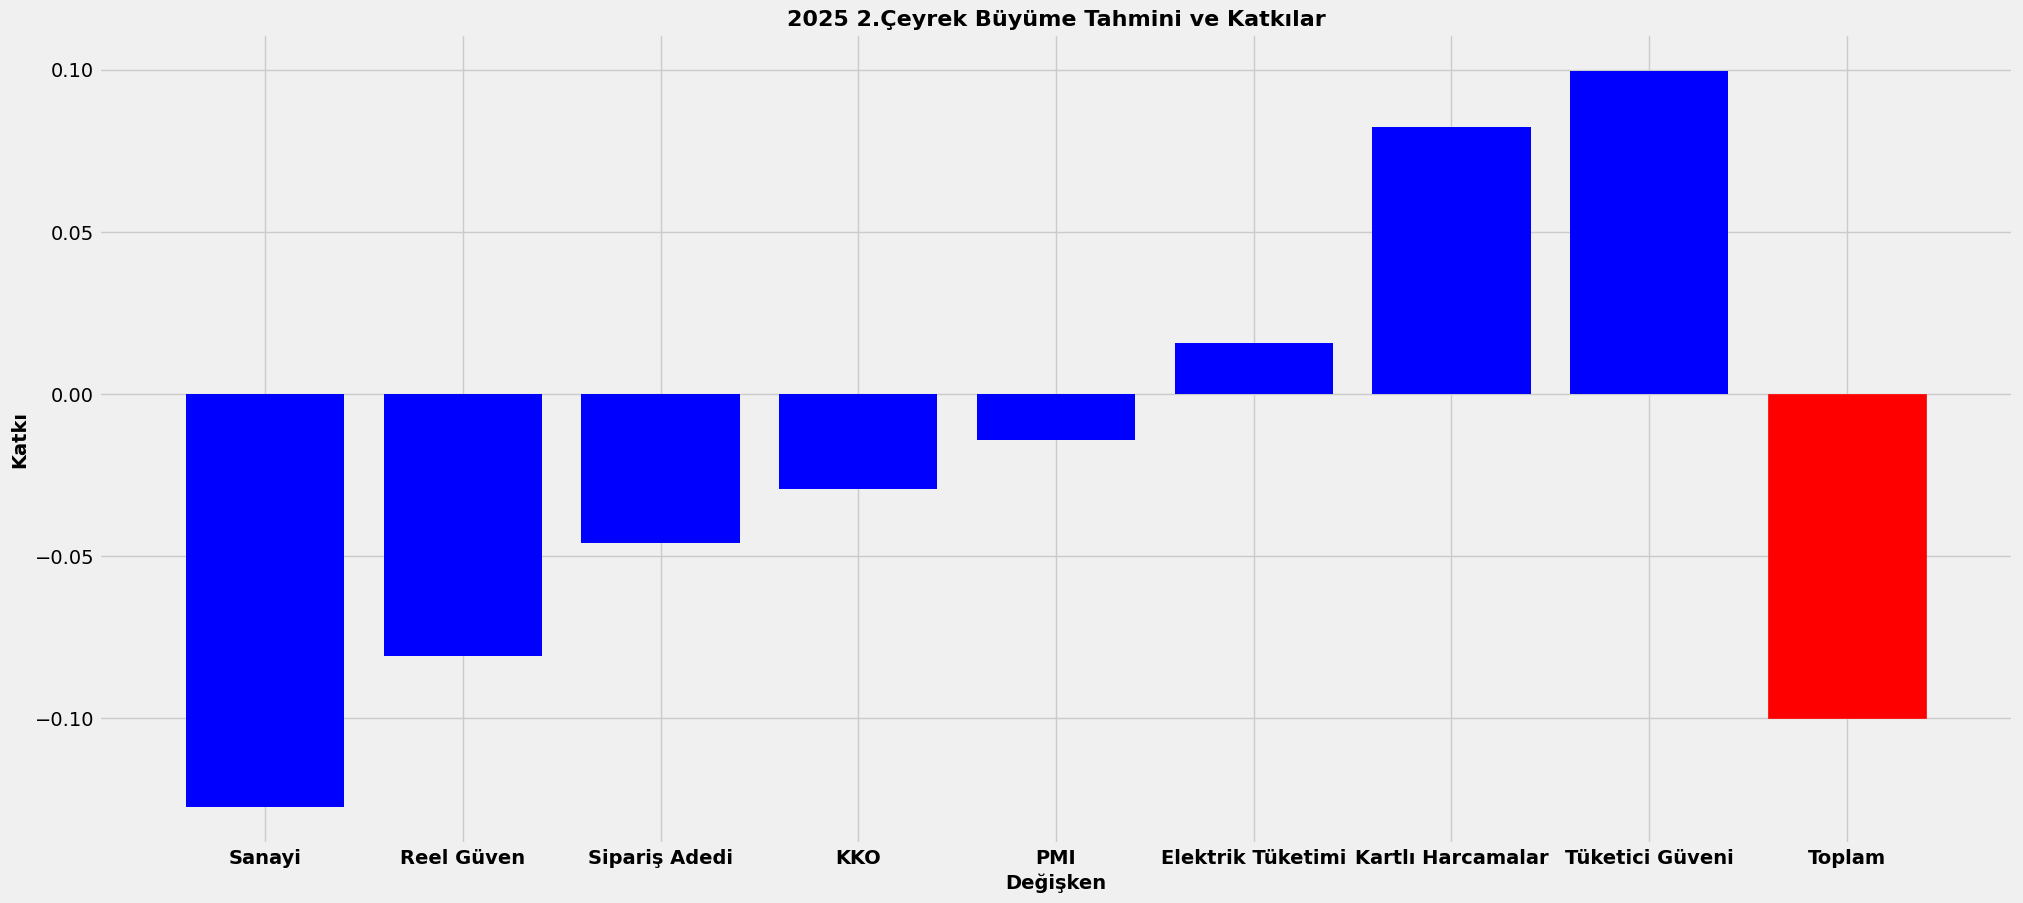

In [195]:
plt.figure(figsize=(22,10))
bars = plt.bar(katkılar_son.index, katkılar_son.values, color=['blue']*8 + ['red'])

# Ekseni ve başlıkları kalın yap
plt.xlabel("Değişken", fontsize=14, fontweight='bold')
plt.ylabel("Katkı", fontsize=14, fontweight='bold')
plt.title("2025 2.Çeyrek Büyüme Tahmini ve Katkılar", fontsize=16, fontweight='bold')
plt.xticks(rotation=0,fontweight="bold")
# Toplam barını farklı renkle göstermek için kırmızı yaptık, isteğe bağlı
bars[-1].set_color('red')

# Grafiği göster
plt.show()

In [47]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
tahminler3

,Büyüme,Tahmin
2022-09-30,0.542207,-0.243316
2022-12-31,1.148543,1.166556
2023-03-31,0.101158,0.454641
2023-06-30,3.998077,3.041071
2023-09-30,0.239144,0.693879
2023-12-31,1.166981,0.348880
2024-03-31,0.975410,1.354023
2024-06-30,-0.195958,0.212448
2024-09-30,-0.067054,-0.285355
2024-12-31,1.687901,1.820339


In [48]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.15454545308243198

In [49]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler[1:]
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

ValueError: Length of values (30) does not match length of index (29)

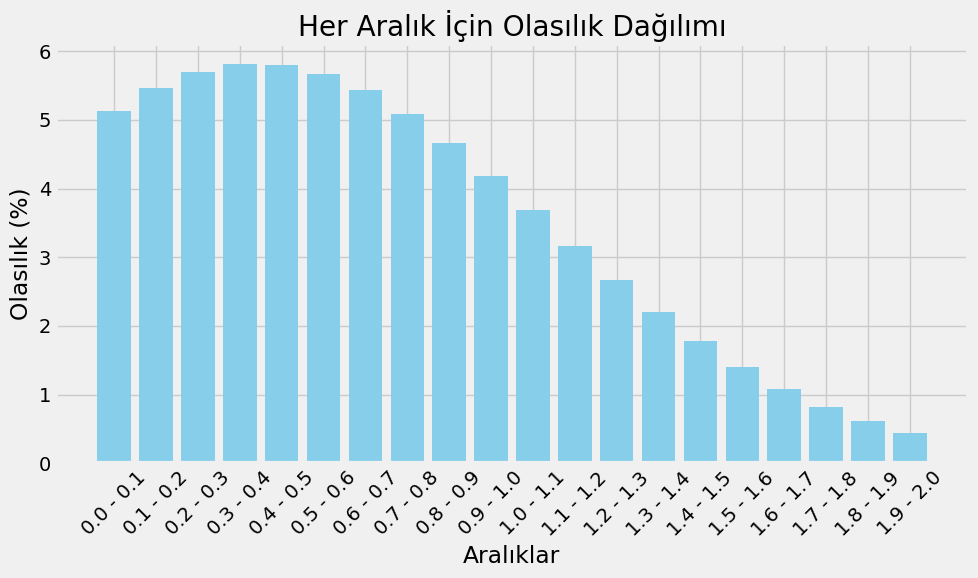

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0
bitis =  2.1

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [60]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.995,0.975,0.95,0.85]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%99 olasılıkla tahminler -0.41 ile 2.62 arasındadır.
%95 olasılıkla tahminler -0.04 ile 2.25 arasındadır.
%90 olasılıkla tahminler 0.14 ile 2.07 arasındadır.
%70 olasılıkla tahminler 0.50 ile 1.71 arasındadır.


In [51]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç=sonuç.round(1)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,-0.4,0.6,-0.2,-0.0,0.5
2022-12-31,1.0,1.4,1.2,1.2,1.1
2023-03-31,0.9,0.8,0.5,0.7,0.1
2023-06-30,3.4,3.8,3.0,3.4,4.0
2023-09-30,1.1,0.1,0.7,0.6,0.2
2023-12-31,0.4,0.6,0.3,0.4,1.2
2024-03-31,1.3,1.4,1.4,1.3,1.0
2024-06-30,0.0,0.1,0.2,0.1,-0.2
2024-09-30,-0.9,-0.6,-0.3,-0.6,-0.1
2024-12-31,1.6,1.5,1.8,1.6,1.7


In [54]:
import pandas as pd
from datetime import datetime


csv_file = "cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-06-16 tarihli tahmin başarıyla eklendi.


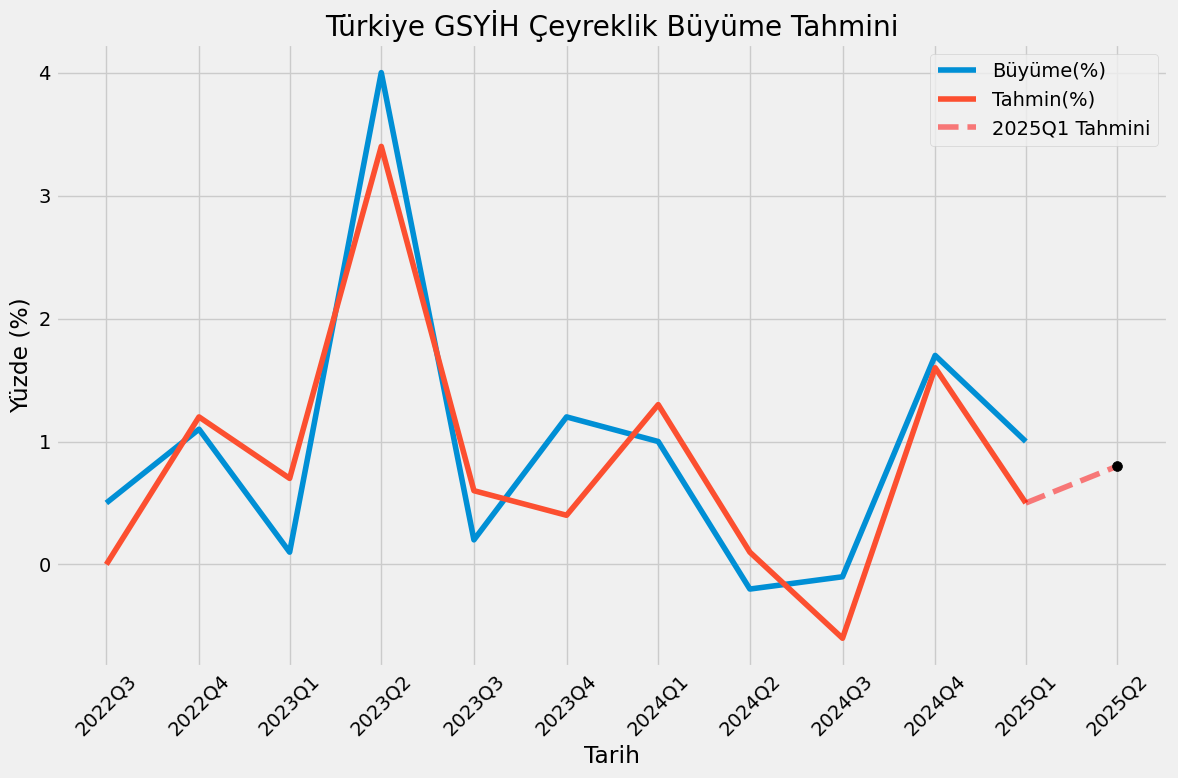

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [64]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [65]:
veri

,Büyüme
1998-03-31,71.633277
1998-06-30,71.062687
1998-09-30,70.062782
1998-12-31,69.881538
1999-03-31,68.703461
...,...
2023-12-31,225.808705
2024-03-31,228.011264
2024-06-30,227.564459
2024-09-30,227.411868


In [66]:


veri.loc[pd.to_datetime("2025-03-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [67]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [68]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [69]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [70]:
veri.to_csv("yıllık.csv")

In [72]:
import pandas as pd
from datetime import datetime


csv_file = "cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-09 tarihli tahmin başarıyla eklendi.


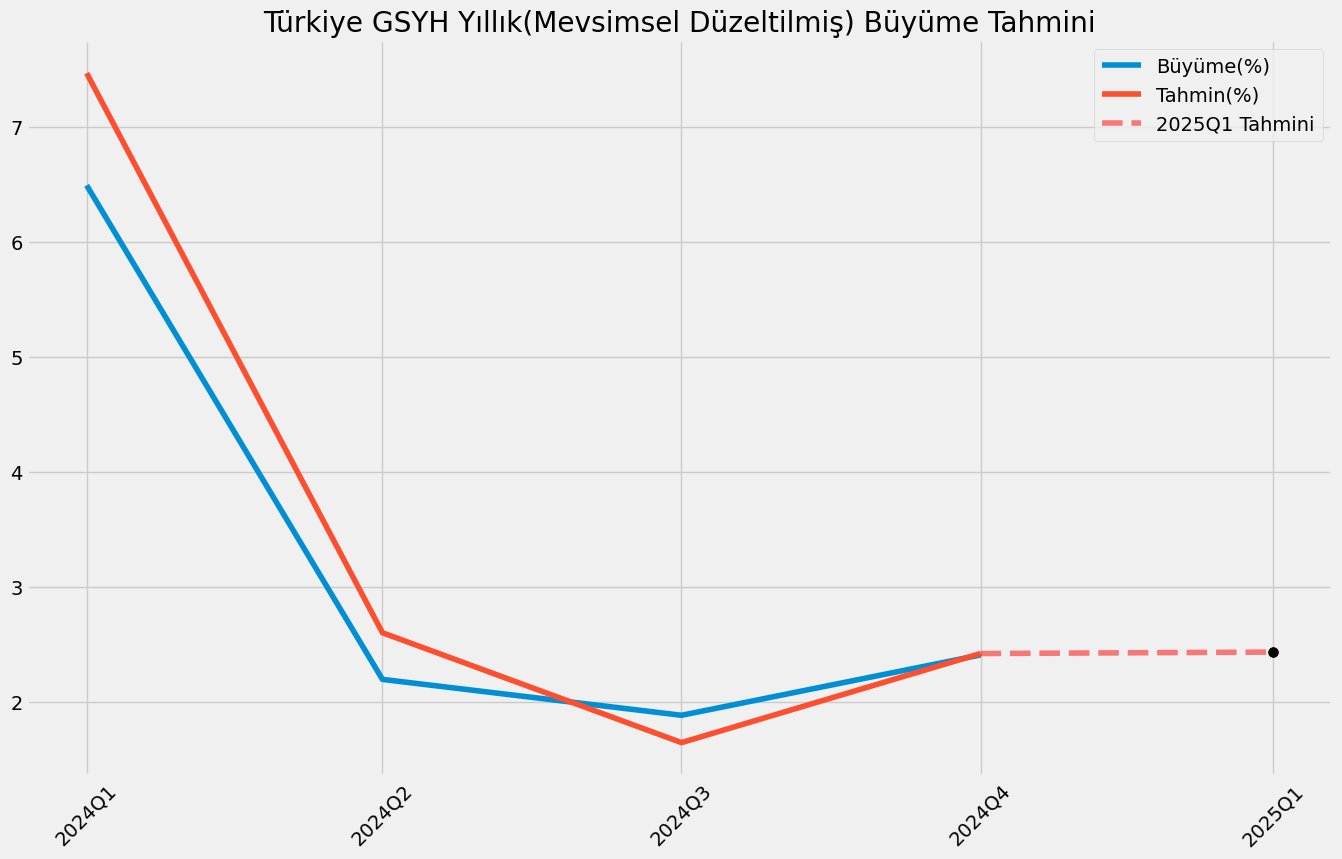

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





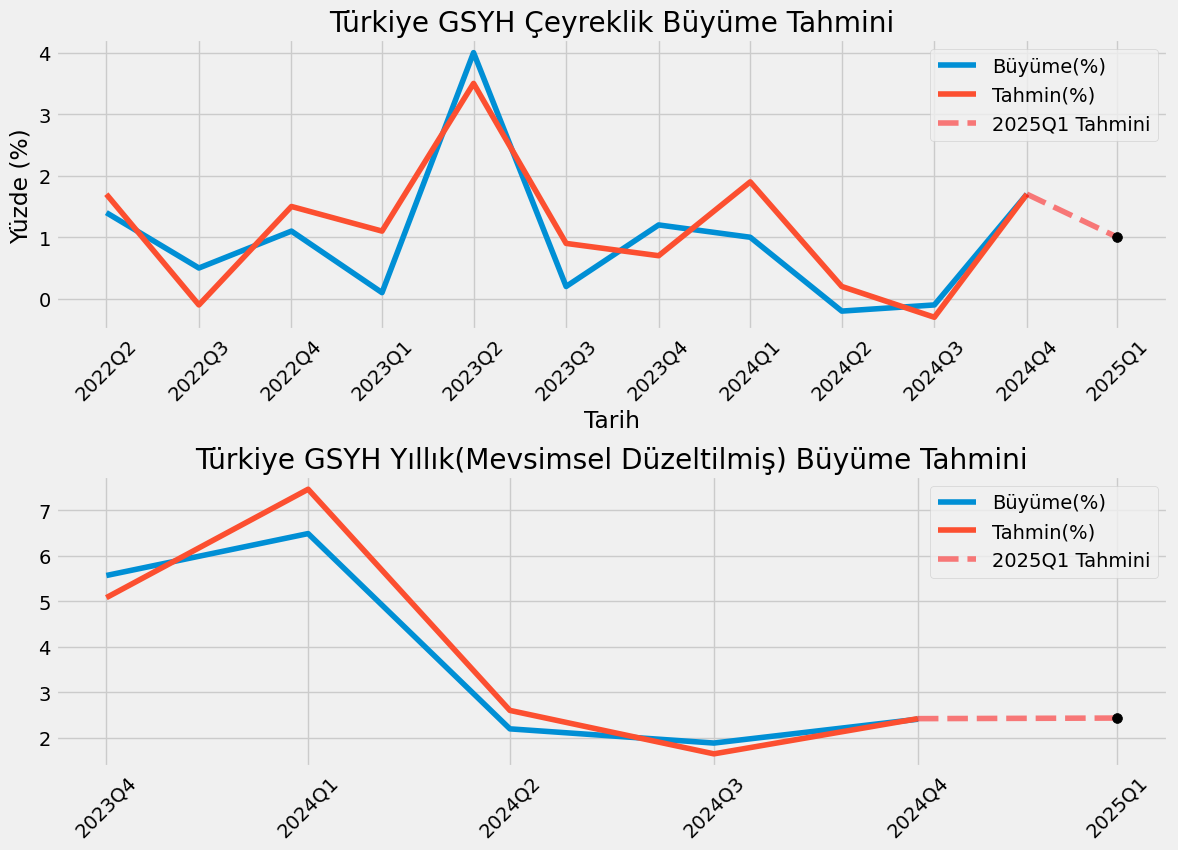

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [75]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-6.004167,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.413535,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


In [76]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [77]:
günlük=pd.read_csv("cari.csv",index_col=0).drop_duplicates(keep="last")
yıllık=pd.read_csv("cariyıl.csv",index_col=0).drop_duplicates(keep="last")
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603
2024-12-23,1.487133,1.664766,1.345328
2024-12-24,1.536500,1.726024,1.385202


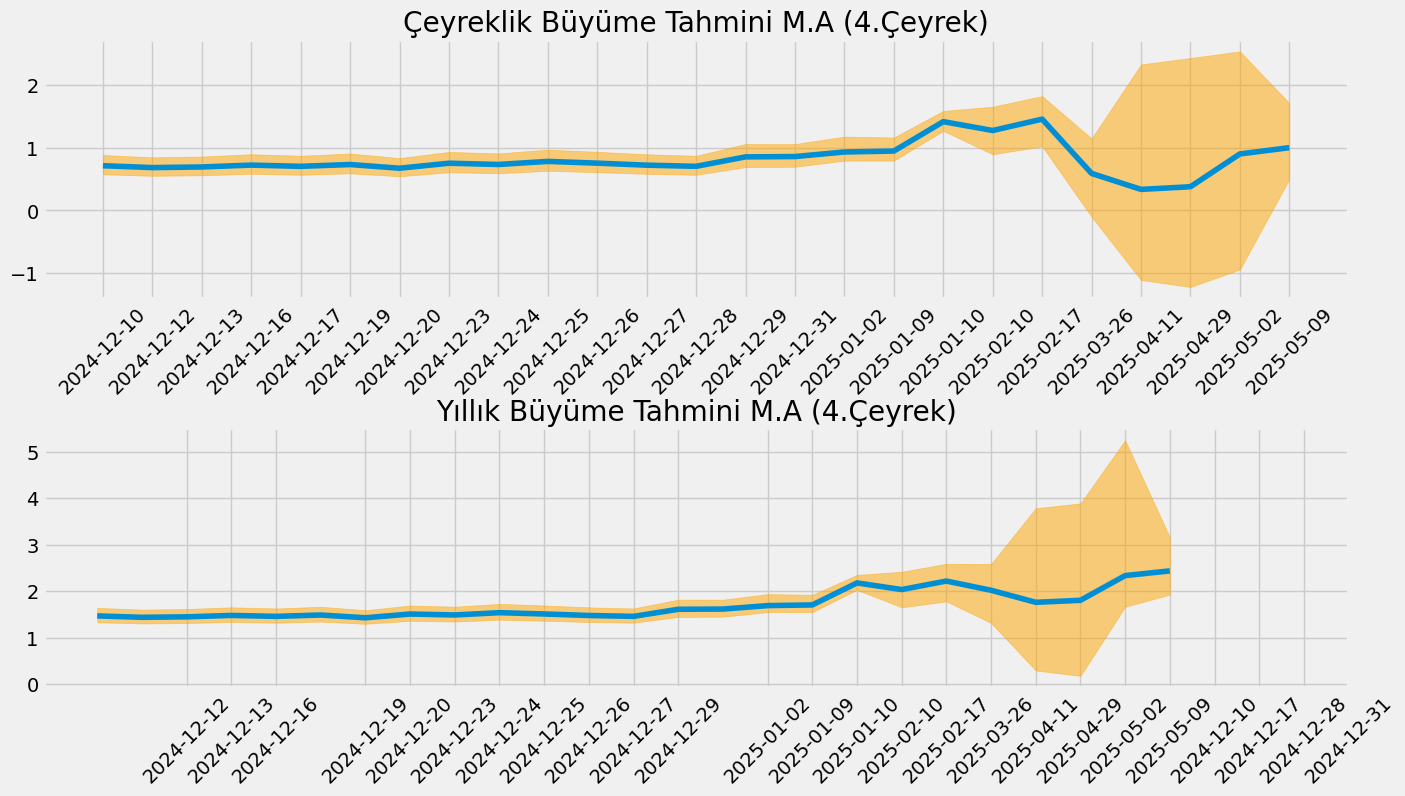

In [78]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [79]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-6.004167,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.413535,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


In [80]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)
arındırılmış.index=pd.to_datetime(arındırılmış.index)
ham.index=pd.to_datetime(ham.index)


arındırılmış.loc["2025-03-31"]=((günlük["Tahmin"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"]
arındırılmış.index=pd.to_datetime(arındırılmış.index)

ham_yıllık=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2025-03-31"]=((günlük["Üst"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_üst=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2025-03-31"]=((günlük["Alt"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_alt=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [83]:
import pandas as pd
from datetime import datetime


csv_file = "ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-09 tarihli tahmin başarıyla eklendi.


In [85]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-6.004167,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.413535,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


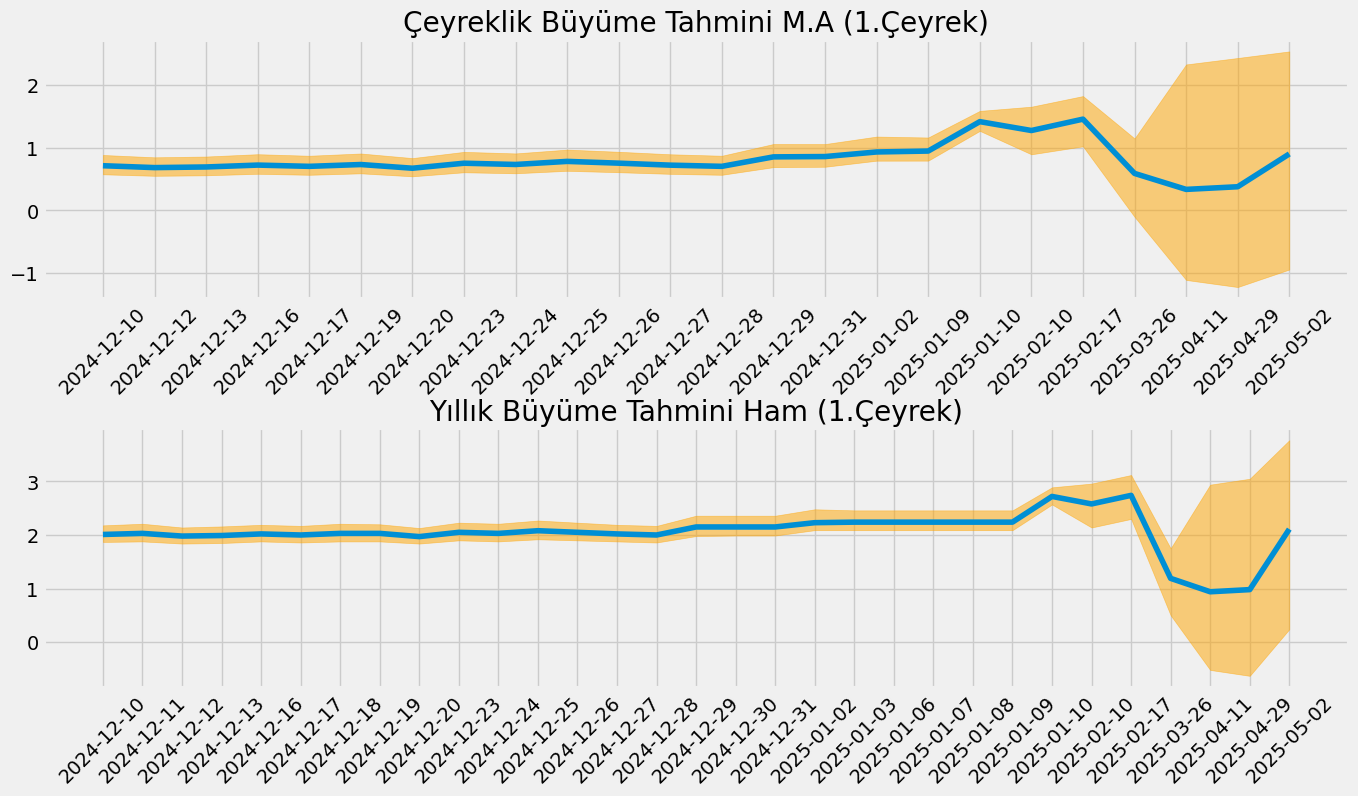

In [188]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (1.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini Ham (1.Çeyrek)")
plt.plot(df["Tahmin"],label="Ortalama")
plt.fill_between(df.index,df["Üst"],df["Alt"],alpha=0.5,color="orange")
plt.xticks(df.index,rotation=45)

plt.subplots_adjust(hspace=0.5)
